In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
mall_data = pd.read_csv("/content/archive.zip")

In [ ]:
print(mall_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
Z = linkage(X_scaled, method='ward')

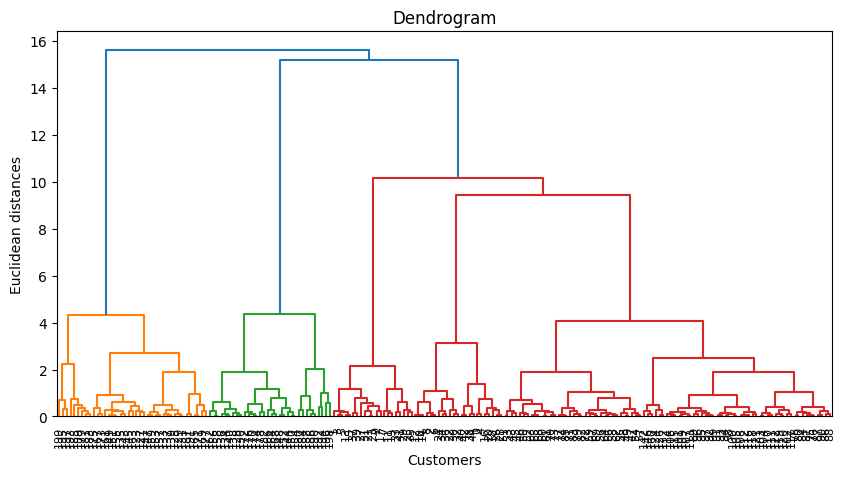

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# Evaluate the algorithm using Silhouette Score

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    clusters = agglomerative.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette Scores

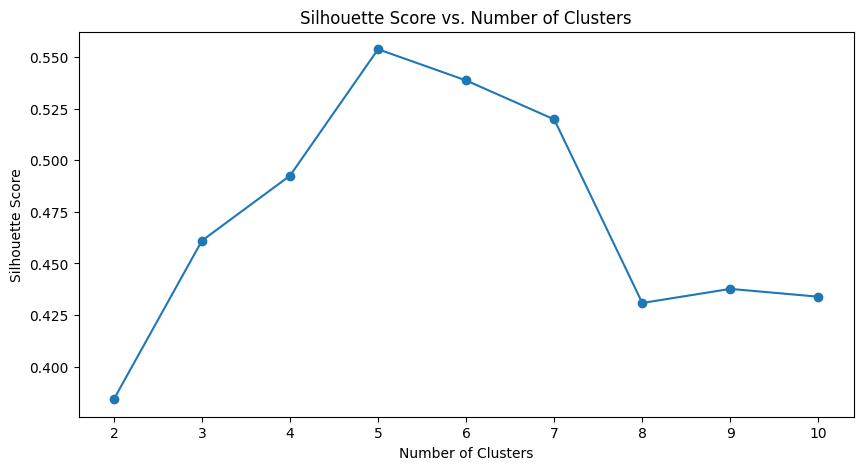

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Selecting the optimal number of clusters based on the highest Silhouette Score

In [ ]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 5


In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
clusters = agglomerative.fit_predict(X_scaled)

# Calculating Silhouette Score with optimal k

In [ ]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5538089226688662


In [ ]:
mall_data['Cluster'] = clusters

# Plotting the clusters

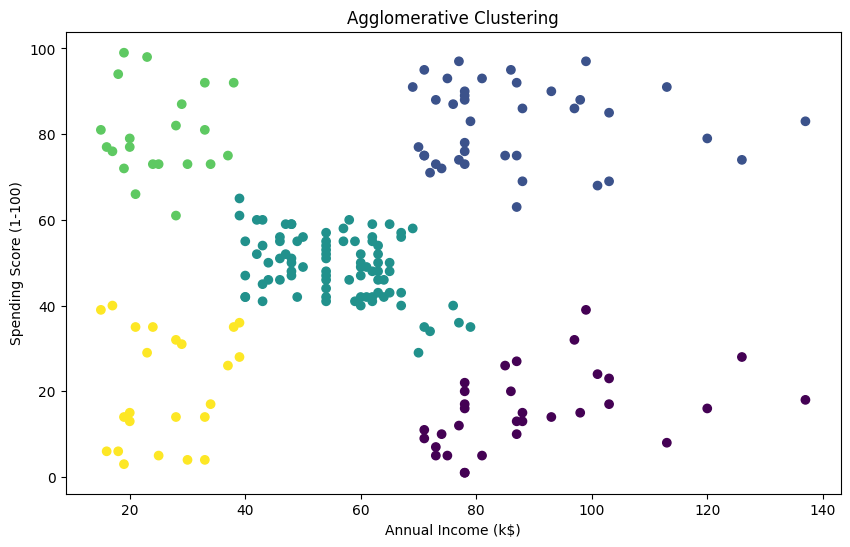

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Insights from clusters formed

In [ ]:
mall_data = mall_data.drop('Gender', axis=1)

In [ ]:
cluster_analysis = mall_data.groupby('Cluster').mean()
print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        166.250000  41.000000           89.406250               15.593750
1        162.000000  32.692308           86.538462               82.128205
2         87.894118  42.482353           55.811765               49.129412
3         22.000000  25.333333           25.095238               80.047619
4         23.000000  45.217391           26.304348               20.913043
